# Data analysis

##### Analyse data to choose the best classification algoritm

### Import libraries

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load the data

In [80]:
df = pd.read_csv('full_data.csv')

In [81]:
activityID_col = df['activityID']

# not needed for building the model
df.drop(['timestamp', 'activityID'], axis=1, inplace=True)

df

,heart rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_ori_1,hand_ori_2,hand_ori_3,hand_ori_4,chest_temp,chest_acc16g_x,chest_acc16g_y,chest_acc16g_z,chest_acc6g_x,chest_acc6g_y,chest_acc6g_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_ori_1,chest_ori_2,chest_ori_3,chest_ori_4,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_acc6g_x,ankle_acc6g_y,ankle_acc6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_1,ankle_ori_2,ankle_ori_3,ankle_ori_4
0,161.981391,24.875,-9.02648,3.43661,1.54825,-9.01793,3.42057,1.15826,0.555154,-0.151351,0.056916,50.18700,5.88661,-19.5242,0.644648,-0.470245,-0.313166,0.515002,32.000,-1.67201,9.44006,-5.710660,-1.85281,9.35804,-5.497500,0.260544,-0.541024,-0.341752,26.41180,-26.1111,32.6134,0.482388,-0.828221,-0.271904,-0.086141,31.3125,6.10403,0.984611,-4.55185,6.27948,3.217450,-4.21250,-0.101032,-0.057742,-0.248516,-41.8305,-16.0762,5.25108,0.574394,-0.385625,0.698415,-0.183254
1,161.981391,24.875,-9.03504,3.35872,1.31746,-9.07594,3.51178,1.33933,0.446266,-0.032756,0.090240,49.92550,6.52141,-19.0026,0.643095,-0.472701,-0.311599,0.515644,32.000,-1.43348,9.70499,-5.397430,-1.73217,9.46350,-5.558370,0.258565,-0.484271,-0.314961,26.29660,-26.2351,31.9083,0.482145,-0.828605,-0.272141,-0.083006,31.3125,5.72218,-1.112940,-3.11494,5.79924,1.009420,-3.94554,-0.205677,-0.029978,0.074442,-41.4590,-15.8389,4.68478,0.574657,-0.384733,0.698825,-0.182742
2,139.000000,24.875,-9.05919,3.58967,1.66270,-9.12040,3.49709,1.44511,0.381105,0.069561,0.111911,50.55390,6.23940,-19.3958,0.641600,-0.475189,-0.310417,0.515932,32.000,-1.31699,10.08140,-5.357820,-1.54924,9.68926,-5.392580,0.230525,-0.413830,-0.314570,26.93590,-25.4845,31.4854,0.482024,-0.828847,-0.272478,-0.080132,31.3125,5.29642,-1.915460,-2.14958,5.51824,-0.970548,-2.74200,-0.280073,0.034477,0.431696,-42.1015,-15.5489,4.82402,0.574965,-0.382317,0.699790,-0.183148
3,161.981391,24.875,-9.09083,3.70512,1.81579,-9.13307,3.63325,1.59583,0.253884,0.168181,0.160226,50.81220,5.60505,-19.5237,0.640446,-0.477570,-0.309667,0.515618,32.000,-1.08602,10.08120,-5.276190,-1.38051,10.00550,-5.181110,0.116015,-0.354116,-0.284253,26.92260,-25.2266,32.0479,0.482021,-0.828923,-0.272902,-0.077896,31.3125,4.45626,-2.171530,-2.69686,5.02562,-1.816670,-1.93449,-0.240229,0.088297,0.643419,-41.7191,-15.8272,4.25836,0.575159,-0.379253,0.700982,-0.184346
4,161.981391,24.875,-9.12301,3.93405,1.93000,-9.19222,3.72433,1.64100,0.105799,0.288910,0.234886,50.81220,5.60505,-19.5237,0.639727,-0.479840,-0.309408,0.514558,32.000,-1.13095,9.66586,-5.469260,-1.27475,10.06560,-5.166460,0.097897,-0.352353,-0.221822,27.05760,-24.7149,31.1999,0.482220,-0.828978,-0.272989,-0.075741,31.3125,5.74280,-1.385140,-2.34124,4.64947,-1.937920,-2.06832,0.123370,0.043536,0.780235,-42.2335,-15.4140,4.68156,0.574358,-0.376820,0.702217,-0.187113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,96.441056,34.750,2.37663,8.01542,5.93722,2.76269,8.58070,6.14836,0.234319,-0.099865,-0.202976,8.01054,-12.35420,-43.3436,0.893579,-0.347882,0.202275,0.198946,36.125,1.71816,9.68980,-0.577606,1.26385,9.49447,-0.105607,-0.102455,-0.076190,0.008494,8.50736,-31.7183,-16.2669,0.647660,-0.605949,0.348619,0.303031,34.3125,9.67824,-0.308950,-2.30756,9.59263,-0.227592,-1.99413,-0.009259,0.022511,-0.049799,-38.9013,31.6323,-7.84251,0.542273,0.403227,0.687356,0.266249
2724949,96.441056,34.750,2.27289,7.86723,6.24407,2.75950,8.09755,6.25513,0.211067,-0.091888,-0.172105,8.37527,-12.00110,-42.9528,0.892954,-0.348894,0.202594,0.199656,36.125,1.15987,9.58174,-0.122718,1.39992,9.66027,-0.166397,-0.045492,-0.055623,-0.024051,8.50183,-31.2021,-16.4108,0.647685,-0.605838,0.348

### Standartize data

In [82]:
scaler = StandardScaler()

data_std = scaler.fit_transform(df)

df_std = pd.DataFrame(data_std, columns=df.columns)
df_std

,heart rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_ori_1,hand_ori_2,hand_ori_3,hand_ori_4,chest_temp,chest_acc16g_x,chest_acc16g_y,chest_acc16g_z,chest_acc6g_x,chest_acc6g_y,chest_acc6g_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_ori_1,chest_ori_2,chest_ori_3,chest_ori_4,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_acc6g_x,ankle_acc6g_y,ankle_acc6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_1,ankle_ori_2,ankle_ori_3,ankle_ori_4
0,2.412961,-4.195581,-0.838447,-0.030246,-0.578505,-0.847352,-0.032303,-0.716334,0.426809,-0.198043,0.042323,1.383191,0.893985,0.274167,0.114029,-1.261259,-0.737691,1.055830,-2.402383,-1.219597,0.290289,-0.898144,-1.246570,0.274222,-0.918510,0.602133,-0.988866,-1.025475,1.436466,0.276847,1.264266,-0.191387,-1.564818,-0.707391,-0.380349,-1.792619,-0.483091,0.177209,-0.464954,-0.484657,0.515215,-0.549893,-0.104095,-0.055567,-0.144707,-0.626674,-0.796155,-0.621932,0.502368,-0.578686,1.301949,-0.212329
1,2.412961,-4.195581,-0.839807,-0.042106,-0.633328,-0.856548,-0.017938,-0.673281,0.343090,-0.072334,0.065254,1.372204,0.919350,0.296574,0.109007,-1.268631,-0.732811,1.056995,-2.402383,-1.077179,0.350089,-0.832602,-1.174359,0.298195,-0.931219,0.597481,-0.886352,-0.939807,1.429558,0.269908,1.232014,-0.192178,-1.566120,-0.707886,-0.372332,-1.792619,-0.545721,-0.116293,-0.091199,-0.569739,0.180690,-0.471429,-0.204047,-0.007886,0.037920,-0.607419,-0.785294,-0.649699,0.503178,-0.577096,1.303191,-0.211227
2,1.477313,-4.195581,-0.843644,-0.006940,-0.551318,-0.863597,-0.020252,-0.648129,0.292991,0.036119,0.080167,1.398606,0.908082,0.279683,0.104172,-1.276098,-0.729130,1.057518,-2.402383,-1.007627,0.435052,-0.824313,-1.064864,0.349514,-0.896602,0.531562,-0.759114,-0.938557,1.467891,0.311911,1.212670,-0.192572,-1.566941,-0.708590,-0.364981,-1.792619,-0.615553,-0.228587,0.159901,-0.619523,-0.119283,-0.117687,-0.275107,0.102805,0.239941,-0.640720,-0.772020,-0.642872,0.504126,-0.572790,1.306115,-0.212101
3,2.412961,-4.195581,-0.848671,0.010639,-0.514952,-0.865605,0.001194,-0.612292,0.195177,0.140655,0.113415,1.409458,0.882735,0.274189,0.100440,-1.283245,-0.726794,1.056948,-2.402383,-0.869723,0.435007,-0.807232,-0.963869,0.421402,-0.852448,0.262363,-0.651252,-0.841614,1.467094,0.326343,1.238399,-0.192582,-1.567199,-0.709475,-0.359262,-1.792619,-0.753354,-0.264418,0.017548,-0.706799,-0.247473,0.119655,-0.237049,0.195233,0.359667,-0.620900,-0.784759,-0.670607,0.504723,-0.567328,1.309726,-0.214678
4,2.412961,-4.195581,-0.853784,0.045497,-0.487821,-0.874983,0.015538,-0.601552,0.081322,0.268625,0.164793,1.409458,0.882735,0.274189,0.098114,-1.290058,-0.725987,1.055024,-2.402383,-0.896549,0.341257,-0.847632,-0.900565,0.435063,-0.849389,0.219770,-0.648067,-0.641982,1.475188,0.354976,1.199611,-0.191934,-1.567385,-0.709656,-0.353751,-1.792619,-0.542339,-0.154381,0.110048,-0.773441,-0.265843,0.080320,0.110244,0.118362,0.437034,-0.647561,-0.765846,-0.649857,0.502258,-0.562990,1.313467,-0.220632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,-0.255402,1.018797,0.973309,0.666946,0.464078,1.020276,0.780411,0.470174,0.180135,-0.143468,-0.136523,-0.388801,0.165130,-0.749078,0.919100,-0.893994,0.867540,0.482111,0.137096,0.804555,0.346660,0.175934,0.618946,0.305235,0.207313,-0.251233,-0.149231,0.094485,0.362907,-0.036923,-0.971592,0.346829,-0.811158,0.588037,0.614888,0.509057,0.103141,-0.003794,0.118808,0.102325,-0.006722,0.102125,-0.016437,0.082255,-0.032336,-0.474854,1.387509,-1.263947,0.403484,0.827541,1.268447,0.754877
2724949,-0.255402,1.018797,0.956826,0.644382,0.536969,1.019770,0.704315,0.495561,0.162258,-0.135013,-0.115279,-0.373478,0.179239,-

### Check the correlation between features

Text(0.5, 1.0, 'Covariance matrix')

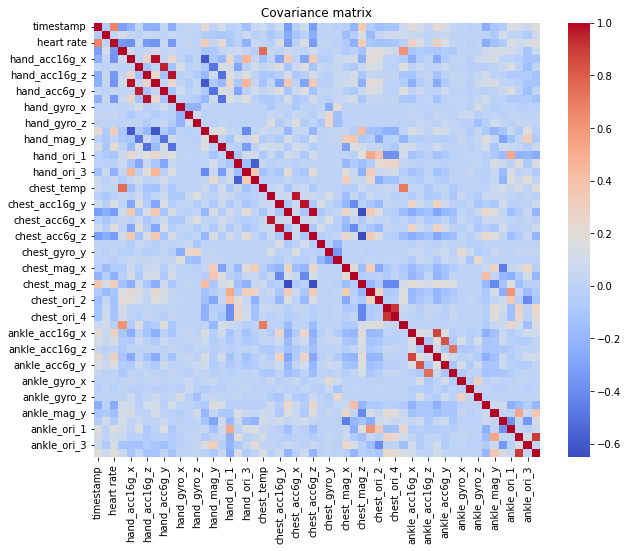

In [39]:
cov_matrix = std_df.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Covariance matrix')

As we can see, there is almost no high correlations between features.

### Test a few classification algoritms

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
# classes given in readme files 
activities_classes = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic walking',
    9: 'watching TV',
    10: 'computer work',
    11: 'car driving',
    12: 'ascending stairs',
    13: 'descending stairs',
    16: 'vacuum cleaning',
    17: 'ironing',
    18: 'folding laundry',
    19: 'house cleaning',
    20: 'playing soccer',
    24: 'rope jumping',
}

In [85]:
# make sample data which is 10% from original
df_sample = pd.concat([df_std, activityID_col], axis=1).sample(frac=0.25, random_state=42)
df_sample

,heart rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_ori_1,hand_ori_2,hand_ori_3,hand_ori_4,chest_temp,chest_acc16g_x,chest_acc16g_y,chest_acc16g_z,chest_acc6g_x,chest_acc6g_y,chest_acc6g_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_ori_1,chest_ori_2,chest_ori_3,chest_ori_4,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_acc6g_x,ankle_acc6g_y,ankle_acc6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_1,ankle_ori_2,ankle_ori_3,ankle_ori_4,activityID
1262004,2.412961,-1.357375,0.953507,0.370695,-1.847865,1.039673,0.560083,-1.726542,2.648512,-1.977608,0.877996,2.191906,0.176886,0.728150,1.263277,0.150152,0.237598,0.120975,-1.248074,-1.185863,-4.867211,0.486893,-1.355263,-4.770968,0.283126,-4.893054,-0.689242,1.931853,-2.328532,-1.410462,0.453978,1.494241,1.243442,-0.139754,-0.160058,-0.354072,0.123687,0.874354,0.952165,0.324895,1.959674,0.506051,-1.341650,0.675690,-1.268698,-1.130837,-1.508489,1.040016,1.812598,0.108738,-0.813841,0.181983,24
683695,0.410212,-0.796335,-0.605091,-0.199405,-0.554104,-0.681115,0.045079,-0.587585,-6.009473,1.828352,-1.059406,1.553443,0.885509,0.538834,-0.778362,1.715376,-0.700600,-1.164314,-0.132243,0.132247,-0.248196,0.076231,0.265843,-0.153917,0.014347,0.436873,-1.027187,0.601320,0.542407,-0.601521,1.147502,0.133483,-0.529037,-1.149085,-1.163915,-0.114314,-1.008881,-0.658835,0.620193,-1.304179,-0.726104,0.764042,0.434559,-1.098968,1.303307,0.676310,-1.856591,-1.082224,0.868458,-1.020366,0.026825,-0.254358,4
2318724,-1.098485,-0.961347,0.554630,-0.220408,1.327911,0.557334,-0.236192,1.271349,-0.002861,-0.015256,0.021580,-0.691167,-1.427604,-3.128380,0.294761,-0.046069,-0.006158,-1.161129,-1.209597,0.227231,-0.240856,-1.227652,0.233817,-0.275551,-1.213399,0.105640,0.042957,0.051800,-1.085329,-0.062720,1.749085,-1.532867,0.452124,-2.010637,-1.108153,-1.409006,0.002899,0.375024,-0.128093,-0.007384,0.405543,-0.188636,-0.041229,0.050308,0.006281,-0.375056,-0.390812,0.804060,-1.121532,-1.307258,-1.282249,-1.078070,10
77219,-0.514806,0.490758,0.875282,-0.217899,1.179657,0.894074,-0.214859,1.209723,0.011582,-0.057761,-0.026868,-1.075172,0.973616,-0.589440,0.224594,0.135695,0.692040,1.427278,0.137096,0.141831,0.374661,0.406607,0.146968,0.377334,0.442007,-0.030629,-0.065941,0.094366,-0.577335,0.204616,-0.874506,-0.529264,0.139124,1.087178,1.467723,0.988573,0.108618,-0.202030,0.492572,0.119485,-0.214927,0.605954,0.036022,0.040580,0.029980,-0.545721,0.000693,1.150727,-1.225601,1.371562,-1.121793,1.684579,17
445758,0.859639,-1.159361,-0.096883,0.545965,-0.875776,-0.097120,0.418844,-0.981087,-0.297783,-1.320644,1.661773,-1.148555,-1.013553,0.425351,-1.633583,-0.196151,2.088726,1.553183,-0.170720,1.005825,1.300005,-0.757421,1.034726,1.101880,-0.476179,0.980528,0.018166,-0.646699,-0.215715,-0.781999,0.434273,-0.614413,-0.927483,1.116574,0.663334,0.461105,1.220896,-0.067003,-0.153374,1.024598,-0.363631,0.714568,0.275385,0.934253,-1.354471,-0.655953,0.320127,0.195406,-0.415506,1.288342,0.613490,1.287193,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701121,-0.255402,0.952792,0.617055,0.863293,-2.022559,0.636216,0.786388,-2.010325,0.216448,0.765896,-0.056663,-0.004205,-0.779259,3.039065,-0.508459,-1.783627,-1.397019,-0.467070,-0.093766,0.577467,0.120199,-0.610745,0.540708,0.179514,-0.559642,-0.080348,0.652373,0.084452,-0.574022,0.073752,-0.216007,-0.707778,-0.240545,1.350547,0.966279,0.317250,0.107894,-0.141826,0.090365,0.136755,-0.215267,0.063087,0.146627,0.108380,-0.062738,-0.034079,0.810717,-0.378552,0.021149,1.253344,0.438971,1.240290,19
722000,0.859639,-1.951418,-0.319954,-0.156140,-0.694225,-0.293601,-0.105249,-0.709762,-0.626870,-0.

In [86]:
X = df_sample.drop('activityID', axis=1)
y = df_sample['activityID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(544990, 52)
(136248, 52)
(544990,)
(136248,)


#### Logistic regression

In [92]:
import time

In [102]:
#!c1.32
logreg_model = LogisticRegression(max_iter=200, C=10.0, penalty='l2')

start_time = time.time()
logreg_model.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9136647877400035
Execution time: 54.930957078933716 seconds


#### Naive Bayes

In [67]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8285332628735834


### Conclusion

So, the best accuracy was reached in __logistic regression__. <br>
I wasn't using __KNN__ and __Random Forest__ algoritms because they require too much time. 

### Find best hyperparameters for logistic regression

In [88]:
from sklearn.model_selection import GridSearchCV

I will set every hyper pearameter individually because otherwise program work too much time

In [101]:
#!c1.32

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}
clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

'penalty' - l2 <br>'C' - 10.0